<a href="https://colab.research.google.com/github/aminehd/AminehTechnicalWritings/blob/main/assignments/ISLP_Chapter03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Setup

In [ ]:
!pip install ISLP

In [3]:
from ISLP import load_data
from ISLP.models import (ModelSpec as MS, summarize)
import statsmodels.api as sm
import pandas as pd

## Chapter 3 ISLP questions

### Q 8.
This question involves the use of simple linear regression on the Auto data set.

(a) Use the sm.OLS() function to perform a simple linear regression with mpg as the response and horsepower as the predictor. Use the summarize() function to print the results. Comment on the output. For example:

In [4]:
# setup the auto data
auto_data = load_data('Auto')
auto_data.head

<bound method NDFrame.head of                             mpg  cylinders  displacement  horsepower  weight  \
name                                                                           
chevrolet chevelle malibu  18.0          8         307.0         130    3504   
buick skylark 320          15.0          8         350.0         165    3693   
plymouth satellite         18.0          8         318.0         150    3436   
amc rebel sst              16.0          8         304.0         150    3433   
ford torino                17.0          8         302.0         140    3449   
...                         ...        ...           ...         ...     ...   
ford mustang gl            27.0          4         140.0          86    2790   
vw pickup                  44.0          4          97.0          52    2130   
dodge rampage              32.0          4         135.0          84    2295   
ford ranger                28.0          4         120.0          79    2625   
chevy s-10                 31.0          4         119.0          82    2720   

                           acceleration  year  origin  
name                                                   
chevrolet chevelle malibu          12.0    70       1  
buick skylark 320                  11.5    70       1  
plymouth satellite                 11.0    70       1  
amc rebel sst                      12.0    70       1  
ford torino                        10.5    70       1  
...                                 ...   ...     ...  
ford mustang gl                    15.6    82       1  
vw pickup                          24.6    82       2  
dodge rampage                      11.6    82       1  
ford ranger                        18.6    82       1  
chevy s-10                         19.4    82       1  

[392 rows x 8 columns]>

In [25]:
# Use MS from ISLP utility to create design matrix ( maybe known as model spec)
design = MS(['horsepower'])
X = design.fit_transform(auto_data)
y = auto_data['mpg']
X

,intercept,horsepower
name,,
chevrolet chevelle malibu,1.0,130
buick skylark 320,1.0,165
plymouth satellite,1.0,150
amc rebel sst,1.0,150
ford torino,1.0,140
...,...,...
ford mustang gl,1.0,86
vw pickup,1.0,52
dodge rampage,1.0,84


In [26]:
# Feed input to stats.model
model = sm.OLS(y, X)
results = model.fit()
# sm.OLS is the algorithm
# result is the hypothesis
print(results.summary())
summarize(results)

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.606
Model:                            OLS   Adj. R-squared:                  0.605
Method:                 Least Squares   F-statistic:                     599.7
Date:                Sat, 24 Aug 2024   Prob (F-statistic):           7.03e-81
Time:                        16:02:04   Log-Likelihood:                -1178.7
No. Observations:                 392   AIC:                             2361.
Df Residuals:                     390   BIC:                             2369.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     39.9359      0.717     55.660      0.0

,coef,std err,t,P>|t|
intercept,39.9359,0.717,55.660,0.0
horsepower,-0.1578,0.006,-24.489,0.0


#### (a)
i is there any relation ship between predictor and result?

Yes by looking at t-stat that is high. also look at scatter

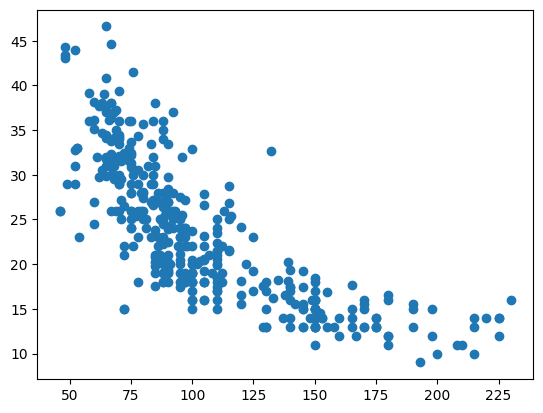

In [27]:
from matplotlib import pyplot as plt
plt.scatter(X['horsepower'], y)

 (a) ii. How strong is the relationship between predictor and response?
Answer: RSS and $R^2$ tells us how strong that is.

In [28]:
# prompt: how do calculate rss and r2 for a sm.ols model fit

# (a) ii. How strong is the relationship between predictor and response?
# Answer: RSS and $R^2$ tells us how strong that is.
print('RSS: %.2f' % results.ssr)
print('R^2: %.2f' % results.rsquared)


RSS: 9385.92
R^2: 0.61


RSS is high but no benchmark to tell how good or bad this rss is.
R^2 is a good benchmark. Since it is equal to 0.61, we can say 61 percent of variation in response(mpg) is explained by horsepower

(a) iii. Is relation between `horsepower` and mpg negative or posititve?
negative because the coefficient of horsepower is -0.15

(a) iv. What is the mpg associated with the horsepower equal to 98?


In [29]:
dir(results)
input = MS(['horsepower'])
X_pred = input.fit_transform(pd.DataFrame({'horsepower': [98]}))
pred = results.predict(X_pred)
print(pred)

0    24.467077
dtype: float64


But if you to get more out of predictions, get yet another object and work with it.

(a) iv. What is the associated 95 % confidence and prediction interval

For prediction interval

In [36]:
pred_class = results.get_prediction(X_pred)
pred_class?
conf_int = pred_class.conf_int(obs=False, alpha=0.05)
print('predicted mean', pred_class.predicted_mean)
print('95 percent conf interval', conf_int)

predicted mean [24.46707715]
95 percent conf interval [[23.97307896 24.96107534]]


For prediction interval

In [37]:
pred_int = pred_class.conf_int(obs=True, alpha=0.05)
print('95 percent prediction interval', pred_int)


95 percent prediction interval [[14.80939607 34.12475823]]


In [12]:
pred_class.conf_int?

#### (b)
Plot the response and the predictor in a new set of axes ax. Use the ax.axline() method or the abline() function defined in the lab to display the least squares regression line.

39.93586102117048


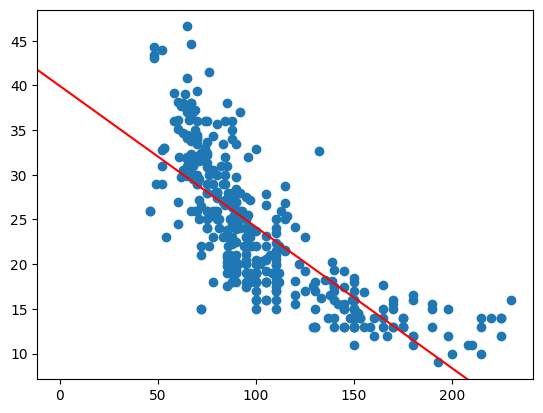

In [38]:
fig, ax = plt.subplots()

ax.scatter(X['horsepower'], y)
params = results.params
print(params['intercept'])
ax.axline(xy1=(0, params['intercept']), slope=params['horsepower'], color='red')
# ax.axline()
plt.show()

fig, ax =

#### (c)
Produce some of diagnostic plots of the least squares regression fit as described in the lab. Comment on any problems you see with the fit.

Answer, first i plot resid vs fitted values

resids=name
chevrolet chevelle malibu    -1.416046
buick skylark 320             1.108520
plymouth satellite            1.740849
amc rebel sst                -0.259151
ford torino                  -0.837598
                               ...    
ford mustang gl               0.638786
vw pickup                    12.272065
dodge rampage                 5.323097
ford ranger                   0.533873
chevy s-10                    4.007407
Length: 392, dtype: float64


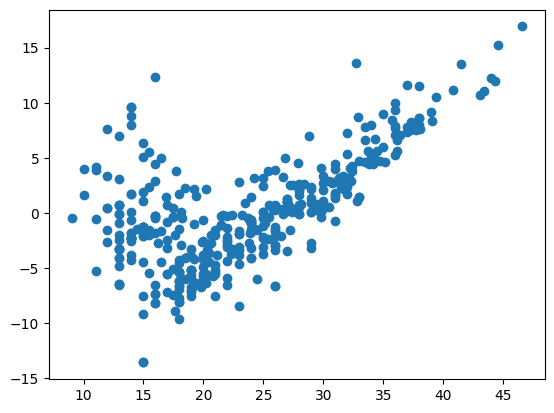

In [43]:
resids = results.resid
print(f'{resids=}')
fig, ax = plt.subplots()
ax.scatter(y, resids)
plt.show()

Resid vs fitted values using sns

In [44]:
import seaborn as sns
fig, ax = plt.subplots()